<center><h2>Partícula en un Potencial Armónico: Quantum Montecarlo</h2></center>
<center><h3>Tarea #1 - Física Estadística</h3></center>
<center><h3>Profesor: Johans Restrepo</h3></center>

<center><h3>Por: Jorge Cárdenas</h3></center>

<center><h5>Universidad de Antioquia, MSc in Physics</h5></center>




In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl
%matplotlib inline

###  1. Partícula en un potencial armónico con T->0

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Ecuación del potencial:</p>
$$
    V(x)=\frac{x^2}{2}
$$

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Función de onda para el estado base</p>

$$
 \psi_0 = \frac{1}{\pi^{1/4}}e^{-x^2/2}
$$


<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Donde se debe aplicar Markov-chain Monte Carlo
 Metropolis algorithm para muestrear posiciones x con probabilidad π(x)</p>



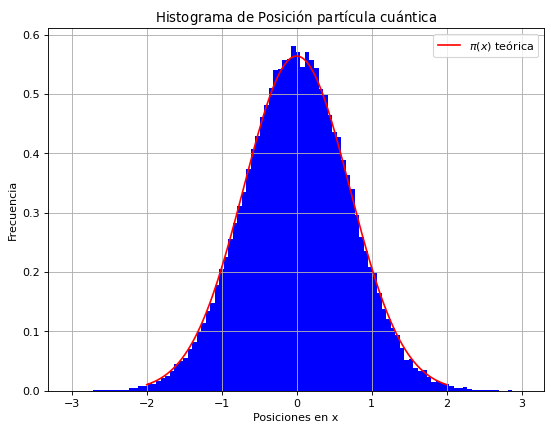

In [2]:


x = 0.0 #Posición inicial
delta = 0.5 # Delta para el cambio de posiciones
n_steps = 150000 #número de muestra para la cadena de markov

x_valid = [] 

x_values = np.linspace(-2.0, 2.0, n_steps) #rango de valor de posiciones

"""Función para cálculo función de onda"""

def psi(x,n):
    return (1/np.pi**0.25)*np.exp(-(x**2)/2) # Función de onda en el estado base

def probabilidad(x,n):
    return np.abs(psi(x,n))**2
    

for n in range(n_steps):
    x_new=x+random.uniform(-delta,delta)
    prob_new = probabilidad(x_new,n)
    prob_ = probabilidad(x,n)
    if random.uniform(0.0,1.0) < prob_new/prob_: 
        #Corresponde con el criterio del aceptación de la meustra en metropolis
        #Si se cumple, es como aceptar un movimiento de la partícula a una posición nueva
        x=x_new
    
    x_valid.append(x)

#Cálculo de los valores teóricos
y = probabilidad(x_values,0)
    
"""Gráfica
"""
fig = plt.figure(figsize=(8, 6), dpi=80)

ax = fig.add_subplot()
ax.hist(x_valid, density = True, bins = 100,color = "blue")
ax.plot(x_values, y, linestyle='-', color='red', label = r"$\pi(x)$ teórica")
ax.legend()

plt.xlabel('Posiciones en x')
plt.ylabel('Frecuencia')
plt.title(r'$\mathrm{Histograma\ de\ Posición\ partícula\ cuántica}\ $')
plt.grid(True)
fig.savefig('tarea1_1.png')

plt.show()

###  **2. Partícula en un potencial armónico a temperatura finita**


####  **2.1 Definición de funciones**


In [3]:

grid_x= [i * 0.2 for i in range(-25,26)]


"""Función para cálculo función de onda"""

def psi(x,n):
    return (1/np.pi**0.25)*np.exp(-(x**2)/2) # Función de onda en el estado base

def probabilidad(x,n):
    return np.abs(psi(x,n))**2


"""Función para cálculo todos los niveles excitados en un rango de posiciones"""

def calculate_excited_levels(states,x_values):
    
    funciones={}

    for x in x_values:
        funciones[x]=[psi(x,0)] #estado base
        funciones[x].append(math.sqrt(2.0)*x*funciones[x][0]) #primer estado excitado

        """Con estos dos resultados, calculamos los demás estados excitados"""

        for n in range(2,states+1):
            estado_n_1=math.sqrt(2.0/n)*x*funciones[x][n-1]
            estado_n_2=math.sqrt((n-1.0)/n)*funciones[x][n-2]
            
            funciones[x].append(estado_n_1-estado_n_2)
            
    return funciones
        

"""Función para cálculo de todos los niveles excitados para un valor de posición específico"""

def calculate_excited_level_value(state,x):
    
        
    funcion=[]
    
    funcion.append(psi(x,0))#estado base
    funcion.append(math.sqrt(2.0)*x*funcion[0]) #primer estado excitado
    
    """Con estos dos resultados, calculamos los demás estados excitados"""
    if state>1:
        
        for n in range(2,state+1):
            estado_n_1=math.sqrt(2.0/n)*x*funcion[n-1]
            estado_n_2=math.sqrt((n-1.0)/n)*funcion[n-2]

            funcion.append(estado_n_1-estado_n_2)
            
    return funcion[state]


def probabilidad(x,n):
    return np.abs(psi(x,n))**2

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Comenzamos por obtener los valores de las funciones de onda evaluadas en en rango de posiciones y en todos los niveles de energía definidos.</p>


In [4]:
n_states=6

funciones = calculate_excited_levels(n_states,grid_x)

#se muestran solo los resultados de los dos primeros niveles
for n in range(1):
    
    print("level",n, [funciones[x][n] for x in grid_x])
    print()


level 0 [2.799184392909597e-06, 7.458304327999358e-06, 1.9093120491923166e-05, 4.696149856362874e-05, 0.00011097756752308872, 0.0002519745490309146, 0.0005496754903223565, 0.0011520843816137307, 0.002320013042709098, 0.004488743450746297, 0.008344251073246413, 0.014903153092645628, 0.025573912975171406, 0.042164254297199076, 0.06679129832888488, 0.10165378830641793, 0.1486467680980839, 0.20884091868446822, 0.2819057534684933, 0.3656120532774727, 0.45558067201133257, 0.5454290908346697, 0.6273927923216394, 0.6933762682841502, 0.7362522621713509, 0.7511255444649425, 0.7362522621713509, 0.6933762682841502, 0.6273927923216394, 0.5454290908346697, 0.45558067201133257, 0.3656120532774727, 0.2819057534684933, 0.20884091868446822, 0.1486467680980839, 0.10165378830641793, 0.06679129832888488, 0.042164254297199076, 0.025573912975171406, 0.014903153092645628, 0.008344251073246413, 0.004488743450746297, 0.002320013042709098, 0.0011520843816137307, 0.0005496754903223565, 0.0002519745490309146, 0.00

---

#### **2.2. Movidas en posición**

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Ahora, debemos realizar movidas en posición barriendo los niveles.</p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Se quiere evaluar el comportamiento de la distribución de probabilidad de la particula estar localizada en una posición X.</p>


In [5]:



x_current = 0.0 #posición inicial

n_states=6 #número de niveles de energía
levels = range(0, n_states) #rango de niveles de energía

x_values = np.linspace(-2.0, 2.0, n_steps) 
delta = 0.5 #delta para los saltos de posición

n_steps = 200000 #número de muestras para MCMC
x_valid = {} #posiciones válidas



#Debemos realizar movidas:
#cambiando posición con nivel fijo   

for level in levels:
    result = []
    for n in range(n_steps):

        n_current=level
        x_new=x_current+random.uniform(-delta,delta)

        prob_new = np.abs(calculate_excited_level_value(n_current,x_new))**2
        prob_ = np.abs(calculate_excited_level_value(n_current,x_current))**2

        if random.uniform(0.0,1.0) < prob_new/prob_: 

            x_current=x_new

        result.append(x_current)
    
    x_valid[level]=result





<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Graficas de los histogramas comparando con las distribuciones teoricas.</p>


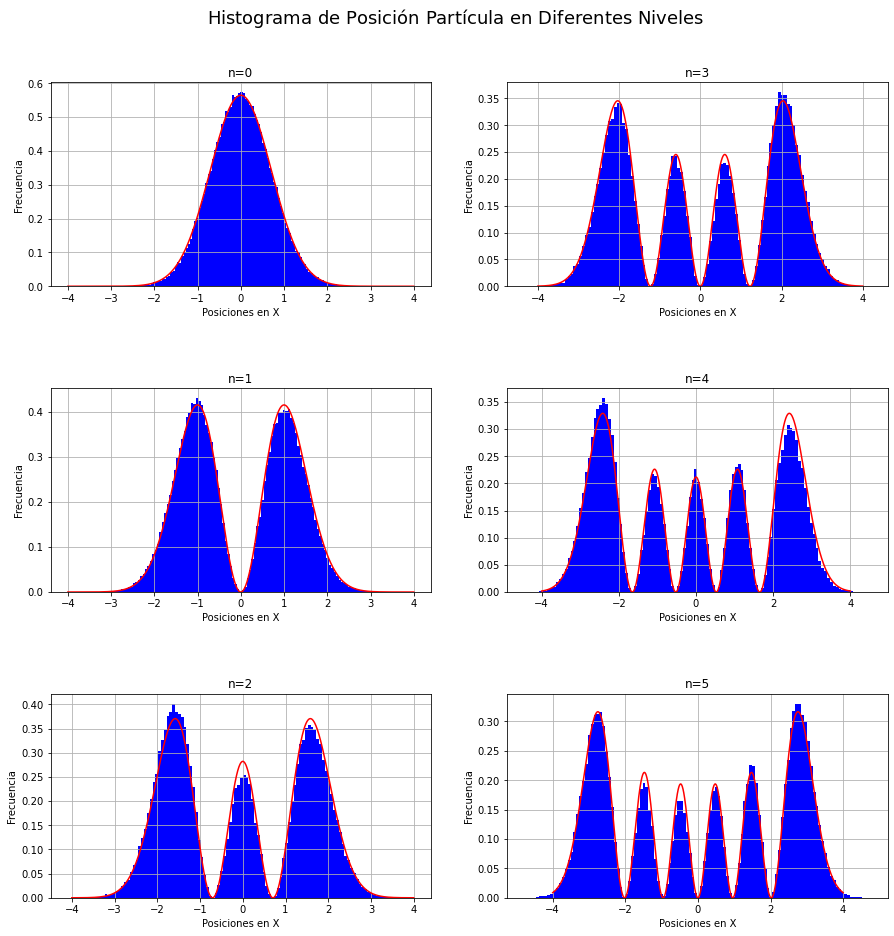

In [6]:
n_counter=0 #contador de niveles para ubicarlos en las subgráficas
x_values = np.linspace(-4.0, 4.0, 2000)  #rango de posiciones

ncols=2 #número de columnas de plots
nrows = int(n_states/ncols)+np.round(n_states%ncols) #número de filas

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle(r'$\mathrm{Histograma\ de\ Posición\ Partícula\ en\ Diferentes\ Niveles}\ $', fontsize=18, y=0.95)

#cálculo todos de los niveles excitados exactos para un rango de posiciones
y_vals = calculate_excited_levels(n_states,x_values)

for col in range(0,ncols):
    for row in range(0,nrows):

        y=np.square([y_vals[x][n_counter] for x in x_values])
        
        axs[row,col].plot(x_values, y, linestyle='-', color='red', label = r"$\pi(x)$ teórica")

        axs[row,col].hist(x_valid[n_counter], density = True, bins = 120,color = "blue")
        axs[row,col].title.set_text('n=%i'%(n_counter))
        axs[row,col].grid()
        n_counter=n_counter+1

    for ax in axs.flat:
        ax.set(xlabel='Posiciones en X', ylabel='Frecuencia')
    

fig.savefig('niveles_posiciones_1.png')

plt.show()

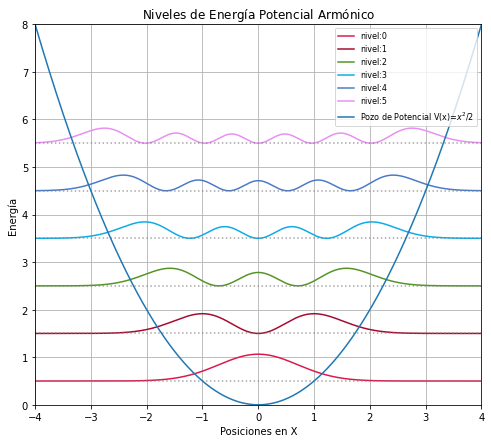

In [27]:

fig, ax = plt.subplots(figsize=(8, 7))

n_states = 6

def calc_En(level):
    return level+0.5

levels = range(0, n_states) #rango de niveles de energía
x_values = np.linspace(-4.0, 4.0, 2000)  #rango de posiciones
y_vals = calculate_excited_levels(n_states,x_values)
y_potential = 0.5*x_values**2


color = [list(np.random.choice(range(0,100), size=3)/100) for i in range(0,n_states)]


for level in levels:
    y=np.square([y_vals[x][level] for x in x_values])  
    ax.plot(x_values, y+calc_En(level), linestyle='-', color=color[level],label = r"nivel:%d"%int(level))
    ax.axhline(y=calc_En(level),color='grey', alpha=0.7, linestyle='dotted')
    ax.legend()
    

ax.plot(x_values,y_potential, label="Pozo de Potencial V(x)=$x^2/2$")
ax.legend(loc="upper left")

ax.set(xlabel='Posiciones en X', ylabel='Energía')
plt.title(r'$\mathrm{Niveles\ de\ Energía\ Potencial\ Armónico}\ $')
plt.grid(True)
plt.xlim([-4, 4])
plt.ylim([0, 8])
plt.legend(loc=1, prop={'size': 8})

fig.savefig('Potencial_Energías.png')

plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

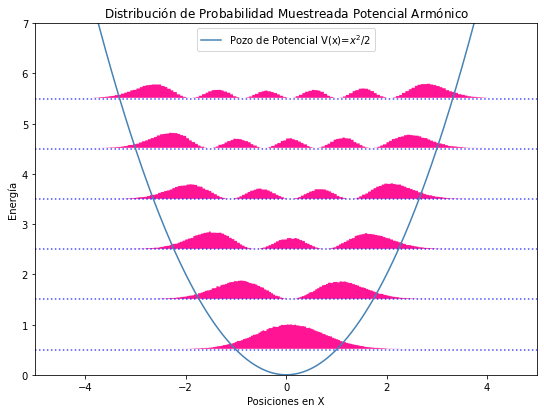

In [29]:
plt.clf()

images=[]
fig, ax = plt.subplots(sharey=False)
n_states = 6
levels = range(0, n_states) #rango de niveles de energía

x_values = np.linspace(-4.0, 4.0, 2000)  #rango de posiciones
y_potential = 0.5*x_values**2

#Generar las imagenes de los histogramas y guardarlos
for level in levels:
    fig, ax = plt.subplots(frameon=False, figsize=(5, 2),sharey=False)
    plt.xlim([-4, 4])
    plt.ylim([0,1.0])

    ax.hist(x_valid[level], density = True, bins = 150,color = "#FF1493")
    ax.set_axis_off()
    fig.savefig('hist/'+str(level)+'.png', dpi=150,transparent=True)
    plt.close()

plt.clf()
fig, ax = plt.subplots(figsize=(9, 8))

#Componer el plot con cada una de las imagenes de los niveles de energía
for level in levels:
    images.append(plt.imread('hist/'+str(level)+'.png'))
    extreme=np.sqrt((level+0.5)/0.5)
    
    #aquí se deben hacer ajustes por la disposción de las imagenes
    ax.imshow(images[level], extent=[-5.1, 5, 0+calc_En(level)-0.13, 1+calc_En(level)])
    ax.axhline(y=calc_En(level),color='blue', alpha=0.7, linestyle='dotted')
    
    #Se deben borrar los ejes de todoas las imagenes de histogramas
    plt.axis('off')

    
ax.plot(x_values, y_potential, linestyle='-', color="#4682B4",label=r"Pozo de Potencial V(x)=$x^2/2$")
ax.set(xlabel='Posiciones en X', ylabel='Energía')
ax.legend()

plt.title(r'$\mathrm{Distribución\ de\ Probabilidad\ Muestreada\ Potencial\ Armónico}\ $')
plt.axis('on')
plt.xlim([-5, 5])
plt.ylim([0, 7])

fig.savefig('Potencial_Energías_Muestreo.png')
plt.show()


---

#### **2.3. Movidas en posición y nivel de energía**

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Aquí debemos considerar que dada una temperatura T, la partícula puede estar ubicada en diferentes niveles de energía, lo que necesariamente cambia su probabilidad de estar localizada en una posición X.</p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Vamos a evaluar diferentes valores de $\beta$, y con ellos como cambia la distribución para bajas o altas temperaturas.</p> 


In [9]:

betas = [0.1,0.2,1.0,5.0] #definición de los beta de interés


n_steps = 400000 #número de muestras para MCMC

n_states=50 #número de niveles de energía
levels = range(0, n_states) #rango de niveles de energía

x_valid_pos_n={} #Cadena de Markov con las posiciones
En_valid_pos_n={} #Cadena de Markov con las Energías

x_current = 0.0 # X inicial
n_inicial=0 # nivel de energía inicia

"""Función para el cálculo de la energía para un nivel dado"""

def calc_En(n):
    return n+1/2


for Beta in betas:   
    #Realizamos el procedimiento para cada beta de interés
    
    result = [] #Resultado parcial de X
    result_En = [] #Resultado parcial de En
    
    n_current=n_inicial # hacemos nivel actual = a nivel inicial
    En_current=calc_En(n_current) # Se calcula la energía de ese nivel
    
    for n in range(n_steps):
        
        """generamos movimiento en las posiciones y se evalua
        la probabilidad según Metropolis.
        Aquí el nivel permanece fijo"""

        x_new=x_current+random.uniform(-delta,delta)
        
        """Se calcula las probabilidad de la función de onda
        para un nivel específico y en un punto específico."""

        prob_new = np.abs(calculate_excited_level_value(n_current,x_new))**2 
        prob_ = np.abs(calculate_excited_level_value(n_current,x_current))**2

        
        if np.random.uniform(0.0,1.0) < prob_new/prob_: 
            x_current=x_new

        """Se genera el cambio de nivel."""
        
        #salto de nivel
        level = random.choice(levels)
        
        if (level)<0:
            #Se queda en el nivel que estaba
            n_current=0
        else:
            
            """Aquí debemos dejar fija la X para evaluar la condición de aceptación."""

            new_level = level 
            En_final = calc_En(new_level) # calculamos el nuevo valor de energía propuesto
            delta_En = En_final-En_current # se halla el delta de energía
            
            """Se calcula las probabilidad de la función de onda
            para un nivel específico y en un punto específico."""

            prob_new_n = np.abs(calculate_excited_level_value(new_level,x_current))**2
            prob_old_n = np.abs(calculate_excited_level_value(n_current,x_current))**2
            
            if random.uniform(0.0, 1.0) < min(1, (prob_new_n/prob_old_n)*np.exp(-Beta*delta_En)):
                n_current = new_level
                En_current = En_final

            

        result.append(x_current)
        result_En.append(En_current)
        
    x_valid_pos_n[Beta] = result
    En_valid_pos_n[Beta] = result_En

    

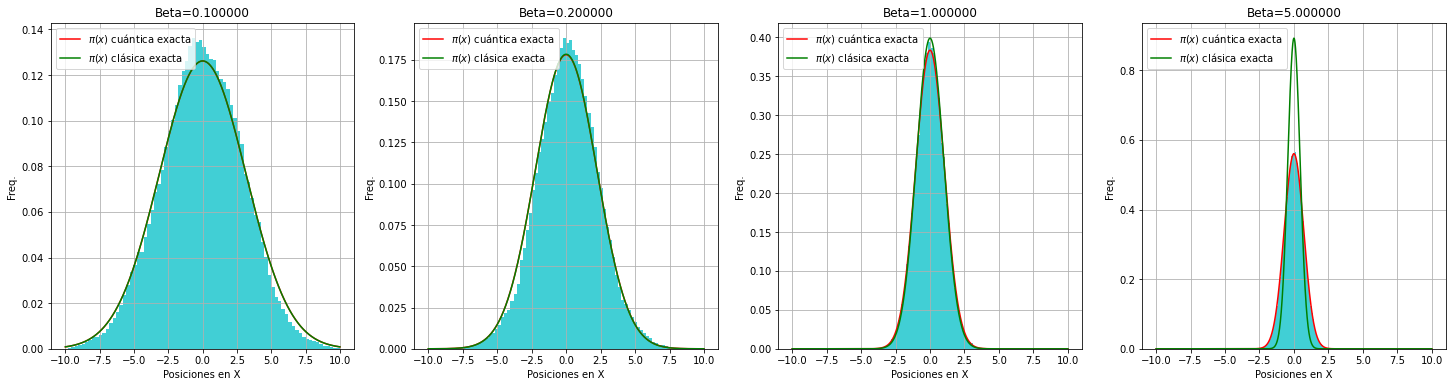

In [10]:
"""Gráficas de la distribución de las posiciones respecto al valor de beta"""

ncols=len(betas)
x_values = np.linspace(-10.0, 10.0, 2000) 

fig, axs = plt.subplots( ncols=ncols, figsize=(25, 6))
plt.subplots_adjust(hspace=0.5)

distribuciones_clasica={}
distribuciones_cuantica={}

for Beta in betas:

    PI_clasica = np.sqrt(Beta/(2*np.pi)) * np.exp(-x_values**2*Beta/2)#Fn de Onda clasica del Estado Base a temperatura Beta
    PI_cuantica = np.sqrt(np.tanh(Beta/2)/np.pi)*np.exp(-x_values**2*np.tanh(Beta/2))#Fn de Onda cuantica del Estado Base a temperaturaBeta

    distribuciones_clasica[Beta]=PI_clasica
    distribuciones_cuantica[Beta]=PI_cuantica
    

for index,beta in enumerate(betas):
    
    axs[index].hist(x_valid_pos_n[beta], density = True, bins = 80,color = "#41CFD5")
    axs[index].title.set_text('Beta=%f'%(beta))
    
    axs[index].plot(x_values, distribuciones_cuantica[beta], linestyle='-', color='red', label = r"$\pi(x)$ cuántica exacta")
    axs[index].plot(x_values, distribuciones_clasica[beta], linestyle='-', color='green', label = r"$\pi(x)$ clásica exacta")

    axs[index].grid()
    axs[index].legend(loc="upper left")
        
for ax in axs.flat:
    ax.set(xlabel='Posiciones en X', ylabel='Freq.')


fig.savefig('distribucion_condicional_betas.png')


plt.show()

---

#### **2.3.1 Niveles de energía**

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Con las energía se puede evidenciar que para altas temperaturas, es decir $\beta \to 0$, debemos considerar estudiar un número más alto de niveles, pues esos niveles superior tienen información sobre la posición de la particula. Caso contrario al de bajas temperaturas, donde la probabilidad se concentra en los niveles má</p>

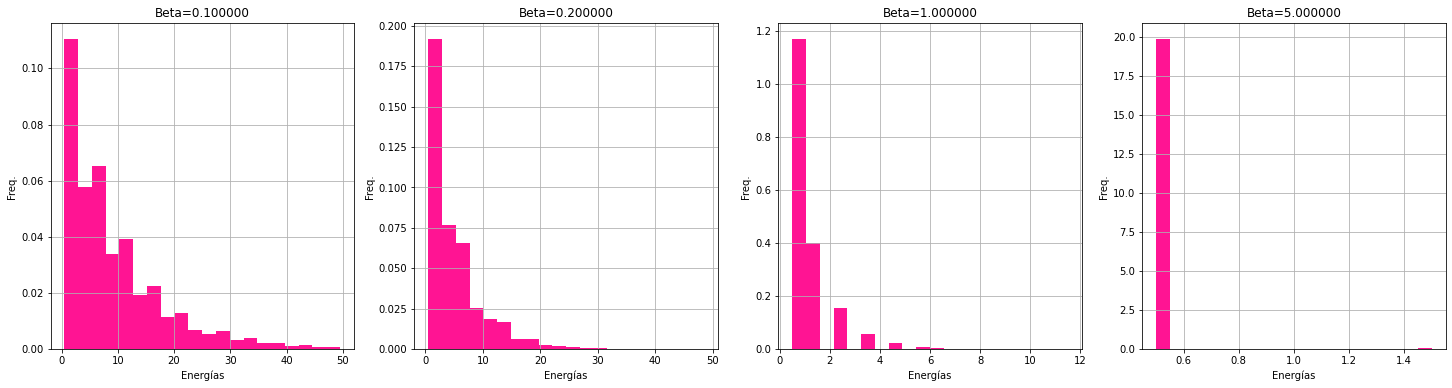

In [11]:
"""Gráficas de las energías respecto al valor de beta"""
betas = [0.1,0.2,1.0,5.0] #definición de los beta de interés


ncols=len(betas)
x_values = np.linspace(-10.0, 10.0, 1000) 

fig, axs = plt.subplots( ncols=ncols, figsize=(25, 6),sharey=False)
plt.subplots_adjust(hspace=0.5)
distribuciones_clasica={}
distribuciones_cuantica={}


for index,beta in enumerate(betas):
    
    axs[index].hist(En_valid_pos_n[beta], density = True, bins = 20,color = "#FF1493")
    axs[index].title.set_text('Beta=%f'%(beta))
    
    axs[index].grid()
        
for ax in axs.flat:
    ax.set(xlabel='Energías', ylabel='Freq.')

fig.savefig('energías_betas.png')

plt.show()

---


#### **2.3.2 Niveles de energía con $\beta$ pequeños**


In [12]:

betas = [0.005,0.01,0.05,0.1] #definición de los beta de interés


n_steps = 100000 #número de muestras para MCMC

n_states=200 #número de niveles de energía
levels = range(0, n_states) #rango de niveles de energía

x_valid_pos_n={} #Cadena de Markov con las posiciones
En_valid_pos_n={} #Cadena de Markov con las Energías

x_current = 0.0 # X inicial
n_inicial=0 # nivel de energía inicia

"""Función para el cálculo de la energía para un nivel dado"""

def calc_En(n):
    return n+1/2


for Beta in betas:   
    #Realizamos el procedimiento para cada beta de interés
    
    result = [] #Resultado parcial de X
    result_En = [] #Resultado parcial de En
    
    n_current=n_inicial # hacemos nivel actual = a nivel inicial
    En_current=calc_En(n_current) # Se calcula la energía de ese nivel
    
    for n in range(n_steps):
        
        """generamos movimiento en las posiciones y se evalua
        la probabilidad según Metropolis.
        Aquí el nivel permanece fijo"""

        x_new=x_current+random.uniform(-delta,delta)
        
        """Se calcula las probabilidad de la función de onda
        para un nivel específico y en un punto específico."""

        prob_new = np.abs(calculate_excited_level_value(n_current,x_new))**2 
        prob_ = np.abs(calculate_excited_level_value(n_current,x_current))**2

        
        if np.random.uniform(0.0,1.0) < prob_new/prob_: 
            x_current=x_new

        """Se genera el cambio de nivel."""
        
        #salto de nivel
        level = random.choice(levels)
        
        if (level)<0:
            #Se queda en el nivel que estaba
            n_current=0
        else:
            
            """Aquí debemos dejar fija la X para evaluar la condición de aceptación."""

            new_level = level 
            En_final = calc_En(new_level) # calculamos el nuevo valor de energía propuesto
            delta_En = En_final-En_current # se halla el delta de energía
            
            """Se calcula las probabilidad de la función de onda
            para un nivel específico y en un punto específico."""

            prob_new_n = np.abs(calculate_excited_level_value(new_level,x_current))**2
            prob_old_n = np.abs(calculate_excited_level_value(n_current,x_current))**2
            
            if random.uniform(0.0, 1.0) < min(1, (prob_new_n/prob_old_n)*np.exp(-Beta*delta_En)):
                n_current = new_level
                En_current = En_final

            

        result_En.append(En_current)
        
    En_valid_pos_n[Beta] = result_En

    

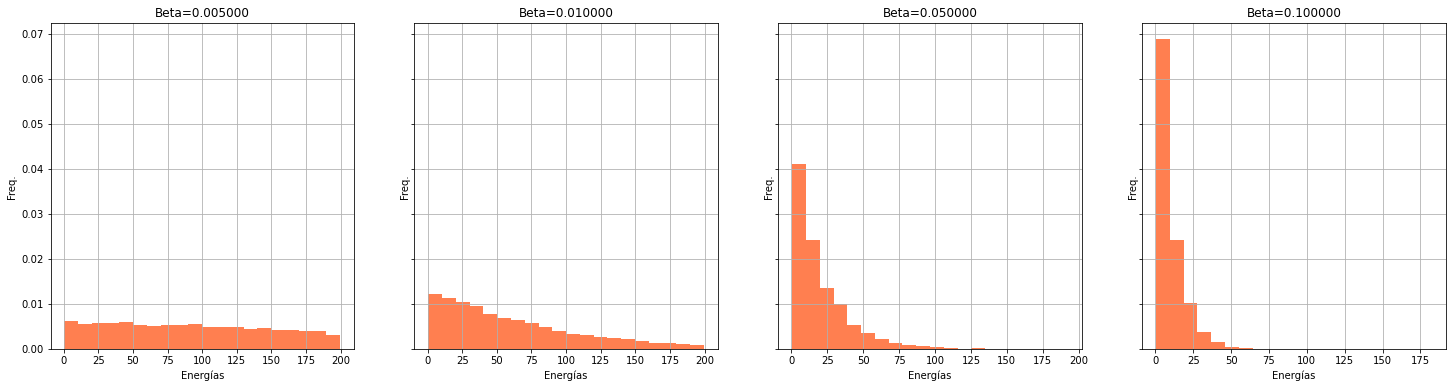

In [13]:
"""Gráficas de las energías respecto al valor de beta"""


ncols=len(betas)
x_values = np.linspace(-20.0, 20.0, 1000) 

fig, axs = plt.subplots( ncols=ncols, figsize=(25, 6),sharey=True)
plt.subplots_adjust(hspace=0.5)
distribuciones_clasica={}
distribuciones_cuantica={}


for index,beta in enumerate(betas):
    
    axs[index].hist(En_valid_pos_n[beta], density = True, bins = 20,color = "#FF7F50")
    axs[index].title.set_text('Beta=%f'%(beta))
    
    axs[index].grid()
        
for ax in axs.flat:
    ax.set(xlabel='Energías', ylabel='Freq.')

fig.savefig('energías_betas_bajos.png')

plt.show()

---

#### **2.4 Comparación de las distribuciones clásica y cuántica para diferentes valores de $\beta$**

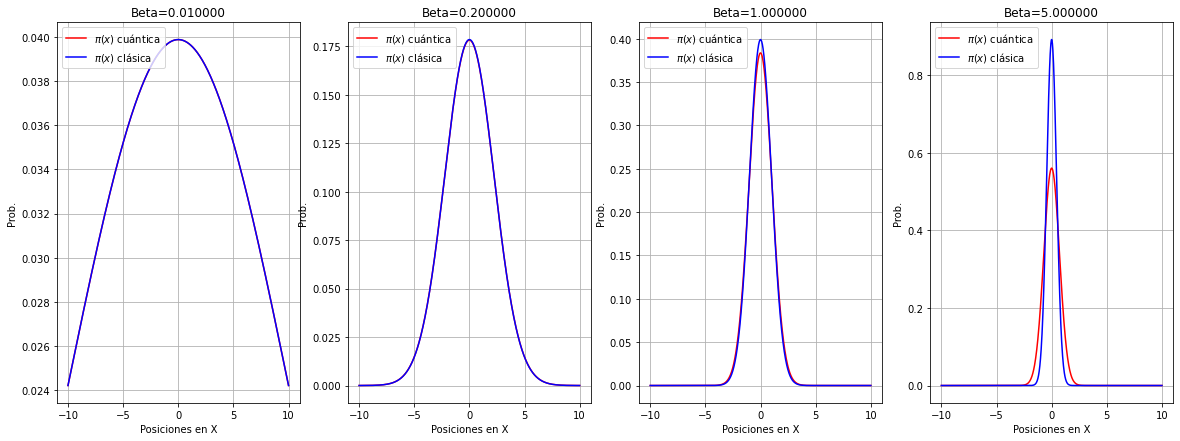

In [14]:

betas = [0.01,0.2,1.0,5.0] #definición de los beta de interés

x_values = np.linspace(-10.0, 10.0, 1000) 
distribuciones_clasica={}
distribuciones_cuantica={}

ncols=len(betas)

fig, axs = plt.subplots( ncols=ncols, figsize=(20, 7))
plt.subplots_adjust(hspace=0.5)


for Beta in betas:

    PI_clasica = np.sqrt(Beta/(2*np.pi)) * np.exp(-x_values**2*Beta/2)#Fn de Onda clasica del Estado Base a temperatura Beta
    PI_cuantica = np.sqrt(np.tanh(Beta/2)/np.pi)*np.exp(-x_values**2*np.tanh(Beta/2))#Fn de Onda cuantica del Estado Base a temperaturaBeta

    distribuciones_clasica[Beta]=PI_clasica
    distribuciones_cuantica[Beta]=PI_cuantica


for col in range(0,ncols):

    axs[col].plot(x_values, distribuciones_cuantica[betas[col]], linestyle='-', color='red', label = r"$\pi(x)$ cuántica")
    axs[col].plot(x_values, distribuciones_clasica[betas[col]], linestyle='-', color='blue', label = r"$\pi(x)$ clásica")


    axs[col].title.set_text('Beta=%f'%(betas[col]))
    axs[col].grid()
    axs[col].legend(loc="upper left")

for ax in axs.flat:
    ax.set(xlabel='Posiciones en X', ylabel='Prob.')

fig.savefig('comparacion.png')

plt.show()


---

#### **3. Conclusiones**


En sistemas complejos, donde tenemos distribuciones de probabilidad de ocurrencia de eventos, pero
no contamos con suficiente información que nos permita hacer pronóstico con certeza, como en el caso
determinar la posici ́on de la partícula en un pozo de potencial sometida a un ba ̃no t ́ermico, se hace relevante el uso de métodos computacionales como el de Markov-Chain Monte-Carlo, con el propósito de inferir la distribución de probabilidad de parámetros del modelo.

Estas herramientas son un recurso fundamental en investigación de fenómenos como decaimiento radiactivo, estudio espectral de fuentes astronómicas y el estudio de imperfecciones en materiales (Landau y Binder), permitiendo una aproximación a los sistemas cuánticos reales.

Por otro lado, se evidenció que para sistemas en los que el baño térmico T → 0, la probabilidad de
encontrar la partícula en x = 0 es más alta, aunque según los principios de la termodinámica, nunca llegaremos a tener un probabilidad del 100 % de que la partícula esté localizada, sino más bien ella estará visitando otros niveles bajos de energía. 

Por otro lado, con el incremento de la temperatura, la distribución de probabilidad se dispersa, queriendo decir que aumenta
la probabilidad de ubicar la partícula en niveles más altos de energía, es decir se van haciendo equiprobables
todos los estados de energía. Esto se puede entender como el resultado de la mezcla de probabilidad de que
la partícula esté en cada uno de los estados puros, representado por las funciones de onda para cada uno
de los niveles de energía

#### **4. Referencias**

1. Landau, D. & Binder, K. A Guide to Monte-Carlo Simulation in Statistical Physics. (Cambridge, 2009).

2. Feynman, R. P. Statistical Mechanics: A set of lectures. (1998).

3. Krauth, W. Statistical Mechanics: Algorithms and Computations. (Oxford University Press, 2006).
